# Explore here

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv('https://raw.githubusercontent.com/LeandroR093/Arbol-de-decision/refs/heads/main/data/processed/entrenamiento_limpio.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/LeandroR093/Arbol-de-decision/refs/heads/main/data/processed/test_limpio.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/LeandroR093/Arbol-de-decision/refs/heads/main/data/processed/target_entrenamiento.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/LeandroR093/Arbol-de-decision/refs/heads/main/data/processed/target_test.csv')

X_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    float64
 3   BloodPressure             614 non-null    float64
 4   SkinThickness             614 non-null    float64
 5   Insulin                   614 non-null    float64
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 43.3 KB


In [2]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [3]:
y_pred_xgb = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_xgb)

0.7207792207792207

In [6]:
resultados = []
for i in range (1,50):
    model_xgb = XGBClassifier(n_estimators = i, random_state = 42)
    model_xgb.fit(X_train,y_train)
    y_pred = model_xgb.predict(X_test)
    print(f'Modelo {i} listo')
    resultados.append((i,accuracy_score(y_test,y_pred)))
best_accuracy = 0
i=0
resultados_m = []
for resultado in resultados:
    resultados_m.append(resultado[1])
    if resultado[1]>best_accuracy:
        best_accuracy = resultado [1]
        i=resultado[0]
print(f'El mejor resultado es con n_estimators: {i} y su accuracy es de {best_accuracy}')

Modelo 1 listo
Modelo 2 listo
Modelo 3 listo
Modelo 4 listo
Modelo 5 listo
Modelo 6 listo
Modelo 7 listo
Modelo 8 listo
Modelo 9 listo
Modelo 10 listo
Modelo 11 listo
Modelo 12 listo
Modelo 13 listo
Modelo 14 listo
Modelo 15 listo
Modelo 16 listo
Modelo 17 listo
Modelo 18 listo
Modelo 19 listo
Modelo 20 listo
Modelo 21 listo
Modelo 22 listo
Modelo 23 listo
Modelo 24 listo
Modelo 25 listo
Modelo 26 listo
Modelo 27 listo
Modelo 28 listo
Modelo 29 listo
Modelo 30 listo
Modelo 31 listo
Modelo 32 listo
Modelo 33 listo
Modelo 34 listo
Modelo 35 listo
Modelo 36 listo
Modelo 37 listo
Modelo 38 listo
Modelo 39 listo
Modelo 40 listo
Modelo 41 listo
Modelo 42 listo
Modelo 43 listo
Modelo 44 listo
Modelo 45 listo
Modelo 46 listo
Modelo 47 listo
Modelo 48 listo
Modelo 49 listo
El mejor resultado es con n_estimators: 7 y su accuracy es de 0.7662337662337663


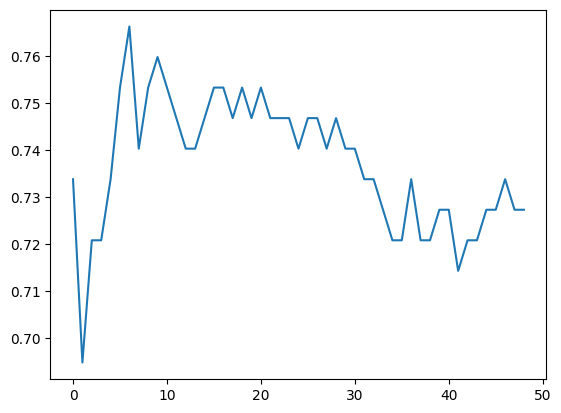

In [7]:
import matplotlib.pyplot as plt

plt.plot(resultados_m)
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier

model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

model_dt.fit(X_train, y_train)
model_rf.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print(f'El accuracy score para un arbol de decision es de: {accuracy_score(y_test,y_pred_dt)} y el del random forest es de:{accuracy_score(y_test,y_pred_rf)}')

El accuracy score para un arbol de decision es de: 0.7142857142857143 y el del random forest es de:0.7337662337662337


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
